# ***Image Classification Using chest X-Ray Dataset***
Created By
* Alwin Joseph Christopher - 201594340 - sgachri4@liverpool.ac.uk
* Mohamed Muradh Maricair - 201602133 - sgmkader@liverpool.ac.uk

In [ ]:
# to be executed if data is loaded from Drive, else please ignore this
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import necessary libraries
import os
import tensorflow as tf
import numpy as np
import keras
from keras.models import load_model
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Flatten
from keras.models import Model,Sequential
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid

In [ ]:
# path directory of the datasets.
# Please change this path information to match where data is stored in your system.
train_dir = '/content/drive/MyDrive/health/Data/train'
test_dir = '/content/drive/MyDrive/health/Data/test'
train_covid19_dir = '/content/drive/MyDrive/health/Data/train/COVID19'
train_normal_dir = '/content/drive/MyDrive/health/Data/train/NORMAL'
train_pneumonia_dir = '/content/drive/MyDrive/health/Data/train/PNEUMONIA'
test_covid19_dir = '/content/drive/MyDrive/health/Data/test/COVID19'
test_normal_dir = '/content/drive/MyDrive/health/Data/test/NORMAL'
test_pneumonia_dir = '/content/drive/MyDrive/health/Data/test/PNEUMONIA'

# Data Preprocessing

In [ ]:
# Constant variables for image size
IMG_SHAPE  = 224
batch_size = 32

In [ ]:
# standardizationa and augmentation is done using ImageDataGenerator

image_gen_train = ImageDataGenerator(rescale = 1./255,validation_split=0.2)
train_data_gen = image_gen_train.flow_from_directory(batch_size = batch_size,directory = train_dir,
                  shuffle= True,target_size = (IMG_SHAPE,IMG_SHAPE),class_mode = 'categorical',subset="training")
valid_data_gen = image_gen_train.flow_from_directory(batch_size = batch_size,directory = train_dir,
                  shuffle= True,target_size = (IMG_SHAPE,IMG_SHAPE),class_mode = 'categorical',subset="validation")

image_gen_test = ImageDataGenerator(rescale=1./255)
test_data_gen = image_gen_test.flow_from_directory(batch_size=32,directory=test_dir,shuffle= True,
                target_size=(IMG_SHAPE, IMG_SHAPE),class_mode='categorical')

Found 4116 images belonging to 3 classes.
Found 1028 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


In [ ]:
#total length of train
total_train = len(os.listdir(train_covid19_dir)) + len(os.listdir(train_normal_dir)) + len(os.listdir(train_pneumonia_dir))
print("Total length of training dataset:",total_train)

Total length of training dataset: 5144


In [ ]:
# Total number trainig samples in each category
print("Number of covid19 training sample:", len(os.listdir(train_covid19_dir)))
print("Number of normal training sample:", len(os.listdir(train_normal_dir)))
print("Number of pneumonia training sample:", len(os.listdir(train_pneumonia_dir)))

Number of covid19 training sample: 460
Number of normal training sample: 1266
Number of pneumonia training sample: 3418


In [ ]:
# Verifying the labels in Training set
print(train_data_gen.class_indices)

{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}


In [ ]:
# Total number of samples in training set after augmentation
print(train_data_gen.samples)

4116


In [ ]:
# Verifying the labels in Test set
print(test_data_gen.class_indices)

{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}


In [ ]:
# Total number of samples in testing set after augmentation
print(test_data_gen.samples)

1288


In [ ]:
# monitoring the shapes of training values
x,y = next(train_data_gen)
y_int = np.argmax(y,axis=-1)
print("X:",x.shape)
print("Y:",y.shape)
y_int

X: (32, 224, 224, 3)
Y: (32, 3)


array([1, 0, 0, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 0, 2, 2, 1, 2, 2, 0, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 2, 1])

# Visualization

In [ ]:
class_mapping = {0:'COVID19',1:'NORMAL',2:'PNEUMONIA'}

In [ ]:
# Visualizing few sample data along with their Labels
def show_grid(image_list,nrows,ncols,label_list=None,show_labels=False,savename=None,figsize=(10,10),showaxis='off'):
    if type(image_list) is not list:
        if(image_list.shape[-1]==1):
            image_list = [image_list[i,:,:,0] for i in range(image_list.shape[0])]
        elif(image_list.shape[-1]==3):
            image_list = [image_list[i,:,:,:] for i in range(image_list.shape[0])]
    fig = plt.figure(None, figsize,frameon=False)
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(nrows, ncols),  # creates 2x2 grid of axes
                     axes_pad=0.3,  # pad between axes in inch.
                     share_all=True,
                     )
    for i in range(nrows*ncols):
        ax = grid[i]
        ax.imshow(image_list[i],cmap='Greys_r')  # The AxesGrid object work as a list of axes.
        ax.axis('off')
        if show_labels:
            ax.set_title(class_mapping[y_int[i]])
            

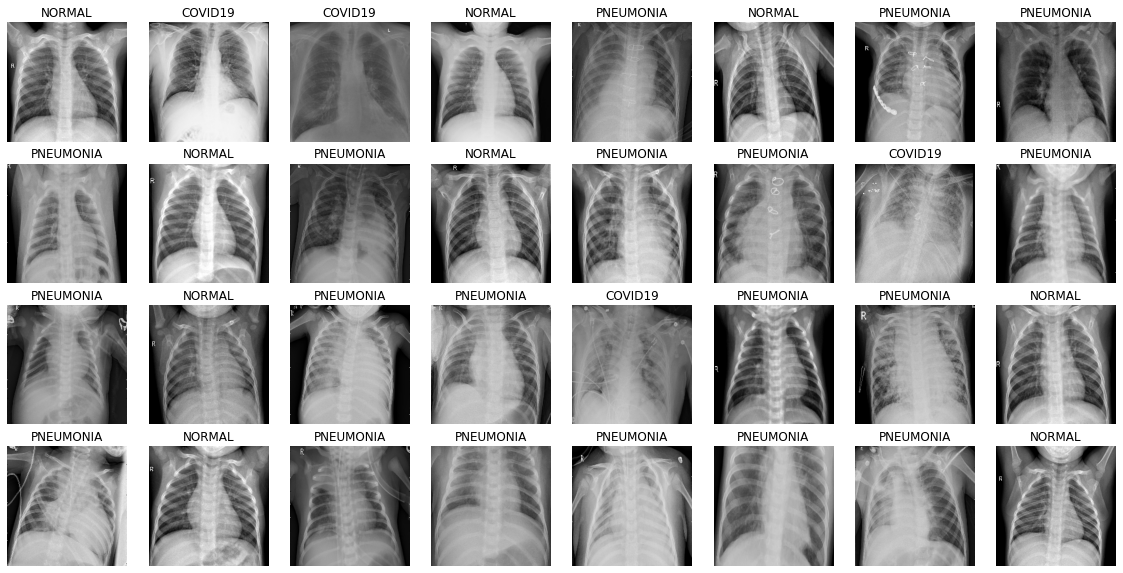

In [ ]:
show_grid(x,4,8,label_list=y_int,show_labels=True,figsize=(20,10))


<Figure size 1152x1152 with 0 Axes>

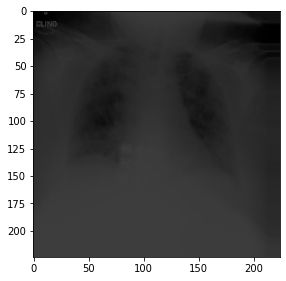

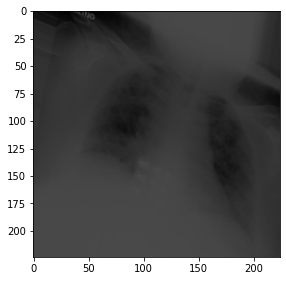

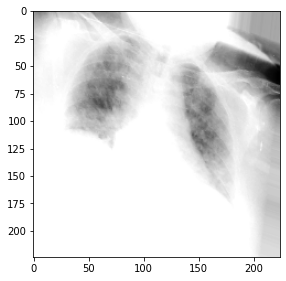

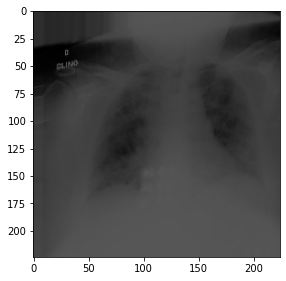

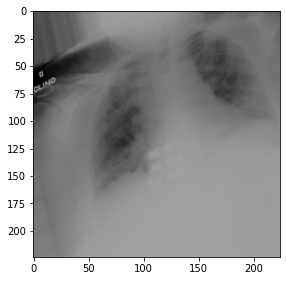

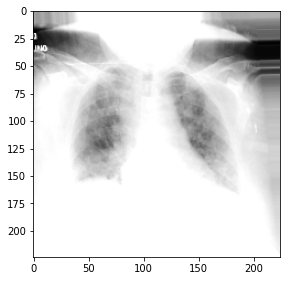

In [ ]:
# Visualizing the train images.
img = keras.preprocessing.image.load_img('/content/drive/MyDrive/health/Data/train/COVID19/COVID19(1).jpg', target_size= (224,224))
img_tensor = keras.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)

# Uses ImageDataGenerator to flip the images
datagen = ImageDataGenerator(width_shift_range=[-10, 10],
height_shift_range=[-10, 10],
rotation_range=12, brightness_range=[0.2, 1.5] ,shear_range=20)

#Creates our batch of one image
pic = datagen.flow(img_tensor, batch_size =1)
plt.figure(figsize=(16, 16))

#Plots our figures
for i in range(1,7):
    plt.figure(figsize=(15, 15))
    plt.subplot(2,3,i)
    batch = pic.next()
    image_ = batch[0].astype('uint8')
    plt.imshow(image_)
    plt.show()

# Metric

In [ ]:
# Function to plot confusion matrix and print classification report
def metrics(model,test_data):

  Y_pred = model.predict(test_data,test_data.samples / batch_size)
  y_pred = np.argmax(Y_pred,axis=1)
  print('Confusion Matrix')
  confusion_matrix(test_data_gen.classes, y_pred)
  plotting = confusion_matrix(test_data_gen.classes, y_pred)
  print(sns.heatmap(plotting,annot= True,fmt='g'))
  print('Classification Report')
  print(classification_report(test_data_gen.classes, y_pred))
  

# Model

In [ ]:
#VGG Model
Vgg_model = tf.keras.applications.VGG16(input_shape=(224, 224, 3), include_top=False, weights="imagenet")

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
# Freezing all the layers
for layer in Vgg_model.layers:
  layer.trainable = False

In [ ]:
# Adding the dense layer for classification 
x = Flatten()(Vgg_model.output)
prediction = Dense(3, activation='softmax')(x)
model = Model(inputs=Vgg_model.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
# model evaluation
result = model.evaluate(test_data_gen,batch_size=batch_size)
print("test_loss, test accuracy",result)

41/41 [==============================] - 315s 8s/step - loss: 1.5721 - acc: 0.2391
test_loss, test accuracy [1.5720549821853638, 0.239130437374115]


Confusion Matrix
AxesSubplot(0.125,0.125;0.62x0.755)
Classification Report
              precision    recall  f1-score   support

           0       0.12      0.03      0.05       116
           1       0.25      0.97      0.39       317
           2       0.00      0.00      0.00       855

    accuracy                           0.24      1288
   macro avg       0.12      0.34      0.15      1288
weighted avg       0.07      0.24      0.10      1288



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


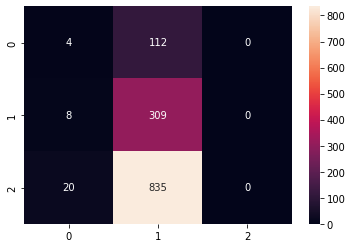

In [ ]:
# Confusion matrix and classification report
metrics(model,test_data_gen)

# Resnet-50


In [ ]:
# Resnet 50 model
res_network = tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3),
    pooling=None,
)

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
# Freezing the layers
for layer in res_network.layers:
  layer.trainable = False

In [ ]:
# model architecture for classification 
from tensorflow.keras import Sequential,optimizers
res_classifier = Sequential()
res_classifier.add(res_network)
res_classifier.add(Flatten())
res_classifier.add(Dense(3, activation='softmax'))

In [ ]:
# Compile the resnet model
res_classifier.compile(loss='categorical_crossentropy',
              optimizer = optimizers.RMSprop(learning_rate=2e-5),
              metrics =['accuracy'])

res_classifier.summary()
res_classifier.save("resnet_model.h5")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dense_1 (Dense)             (None, 3)                 301059    
                                                                 
Total params: 23,888,771
Trainable params: 301,059
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
# Resnet model evaluation
resnet_results = res_classifier.evaluate(test_data_gen,batch_size = batch_size)
print("test_loss, test accuracy",resnet_results)

41/41 [==============================] - 27s 636ms/step - loss: 2.4610 - accuracy: 0.0901
test_loss, test accuracy [2.4609930515289307, 0.09006211161613464]


Confusion Matrix
AxesSubplot(0.125,0.125;0.62x0.755)
Classification Report
              precision    recall  f1-score   support

           0       0.09      1.00      0.17       116
           1       0.00      0.00      0.00       317
           2       0.00      0.00      0.00       855

    accuracy                           0.09      1288
   macro avg       0.03      0.33      0.06      1288
weighted avg       0.01      0.09      0.01      1288



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


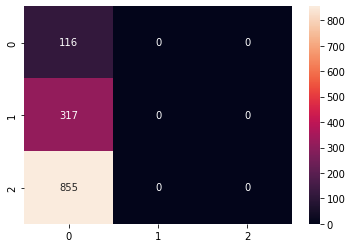

In [ ]:
# Plot confusion matrix and classification report
metrics(res_classifier,test_data_gen)

# Improved Resnet-50 Model

In [ ]:
from keras import Sequential
from keras.layers import Flatten,Dense,Dropout,BatchNormalization,Conv2D,MaxPooling2D

In [ ]:
# New proposed model architecture
new_model = Sequential()
# adding the exisiting resnet layer
new_model.add(res_network)
# adding 2 blocks of convolution layer with kernel size as (2,2) with same padding and relu activation
new_model.add(Conv2D(filters=128, kernel_size=(2,2), padding="same", activation="relu"))
new_model.add(Conv2D(filters=128, kernel_size=(2,2), padding="same", activation="relu"))
# adding batch normalization and dropout
new_model.add(BatchNormalization())
new_model.add(Dropout(0.3))
# adding 3 blocks of convolution layer with kernel size (1,1) and (3,3) with  relu activation
new_model.add(Conv2D(filters=64, kernel_size=(1,1), padding="valid", activation="relu"))
new_model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
new_model.add(Conv2D(filters=64, kernel_size=(1,1), padding="valid", activation="relu"))
# adding maxpooling to reduce the dimensions with pool size of (2,2)
new_model.add(MaxPooling2D(pool_size=(2,2)))
new_model.add(Dropout(0.3))
# final convolution layer with filter size 32 
new_model.add(Conv2D(filters=32, kernel_size=(2,2), padding="same", activation="relu"))
new_model.add(BatchNormalization())
# flattening the layer before adding fulling connected dense layer
new_model.add(Flatten())
# adding 3 blocks of dense layers with different neurons and relu activation
new_model.add(Dense(256,activation='relu'))
new_model.add(Dense(128,activation='relu'))
new_model.add(Dense(64,activation='relu'))
new_model.add(Dropout(0.3))
new_model.add(BatchNormalization())
# final dense layer for 3 classes and using softmax activation
new_model.add(Dense(3,activation='softmax'))
new_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 conv2d (Conv2D)             (None, 7, 7, 128)         1048704   
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 128)         65664     
                                                                 
 batch_normalization (BatchN  (None, 7, 7, 128)        512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 7, 7, 128)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          8256      
                                                      

In [ ]:
# Adding checkpoints to save the best model obtained
from keras import callbacks
check_point = callbacks.ModelCheckpoint('x_ray.h5',monitor="val_acc",save_best_only=True)

In [ ]:
# Compile and fit the proposed model
new_model.compile(loss='categorical_crossentropy',optimizer=RMSprop(learning_rate=0.0001),
                  metrics=['accuracy'])
history = new_model.fit(train_data_gen,epochs = 20,validation_data=valid_data_gen,verbose = 1,callbacks=[check_point])


Epoch 1/20
129/129 [==============================] - 116s 856ms/step - loss: 1.4542 - accuracy: 0.3513 - val_loss: 1.1064 - val_accuracy: 0.2461
Epoch 2/20
129/129 [==============================] - 109s 845ms/step - loss: 1.2954 - accuracy: 0.3722 - val_loss: 1.0653 - val_accuracy: 0.2490
Epoch 3/20
129/129 [==============================] - 109s 850ms/step - loss: 1.2209 - accuracy: 0.3904 - val_loss: 1.0347 - val_accuracy: 0.2519
Epoch 4/20
129/129 [==============================] - 109s 847ms/step - loss: 1.1516 - accuracy: 0.4303 - val_loss: 0.8360 - val_accuracy: 0.6634
Epoch 5/20
129/129 [==============================] - 109s 843ms/step - loss: 1.0676 - accuracy: 0.4896 - val_loss: 0.9354 - val_accuracy: 0.6693
Epoch 6/20
129/129 [==============================] - 109s 844ms/step - loss: 1.0064 - accuracy: 0.5328 - val_loss: 0.7636 - val_accuracy: 0.7471
Epoch 7/20
129/129 [==============================] - 108s 841ms/step - loss: 0.9327 - accuracy: 0.5841 - val_loss: 0.8667 -

In [ ]:
# Save the model
new_model.save('best_model.h5')

In [ ]:
#test results
resnet_results = new_model.evaluate(test_data_gen,batch_size = batch_size)
print("test_loss, test accuracy",resnet_results)

41/41 [==============================] - 26s 633ms/step - loss: 0.3604 - accuracy: 0.8447
test_loss, test accuracy [0.36040377616882324, 0.8447204828262329]


Confusion Matrix
AxesSubplot(0.125,0.125;0.62x0.755)
Classification Report
              precision    recall  f1-score   support

           0       0.11      0.03      0.05       116
           1       0.22      0.26      0.24       317
           2       0.66      0.68      0.67       855

    accuracy                           0.52      1288
   macro avg       0.33      0.32      0.32      1288
weighted avg       0.50      0.52      0.51      1288



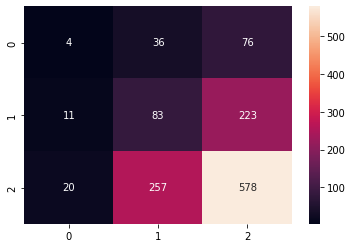

In [ ]:
# Plot the confusion matrix and classification report
metrics(new_model,test_data_gen)

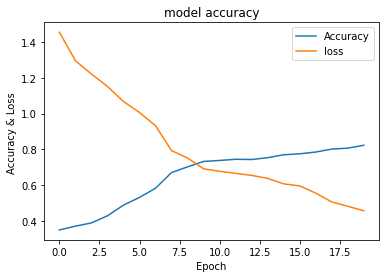

In [ ]:
#plotting the loss and accuracy                                     
plt.plot(history.history["accuracy"])                             
plt.plot(history.history["loss"])
plt.title("model accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy & Loss ")
plt.legend(["Accuracy", "loss"])
plt.show()

# Prediction

In [ ]:
# Predicting the image label using the weights of newly trained weights
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from keras.preprocessing import image
#load saved model
saved_model = load_model('best_model.h5')
x_test,y_test = next(test_data_gen)
img = x_test[0].reshape(-1,224,224,3)

Predict = saved_model.predict(img)

pred_val = int(np.argmax(Predict,axis=1))
act_class = np.argmax(y_test[0])
print("prediction of class:",class_mapping[pred_val])
print("Actual class:",class_mapping[act_class])

prediction of class: PNEUMONIA
Actual class: PNEUMONIA
